In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Input

In [2]:
df = pd.read_csv("data/linear_data.txt", header=None)
df

,0,1
0,-5.00000,-140.824496
1,-4.69132,-123.311058
2,-4.38264,-106.885118
3,-4.07396,-91.546678
4,-3.76528,-77.295735
5,-3.45660,-64.132292
6,-3.14792,-52.056347
7,-2.83924,-41.067900
8,-2.53056,-31.166953
9,-2.22188,-22.353503


### Data Preprocessing

#### create xsum array  
$
\begin{align}
xsum[k] = \sum_{i=1}^n x_i^k
\end{align}
$

In [3]:
n = 3 # Use n = 3 as example
xsum = pd.Series([(df[0] ** i).sum() for i in range(n * 2 - 1)])
xsum

0      33.000000
1      -2.016960
2     285.211037
3     -52.281226
4    4434.141092
dtype: float64

#### create y array
$
\begin{align}
y[k] = \sum_{i=1}^n x_i^k \times y_i
\end{align}
$

In [4]:
y = pd.Series([(df[0] ** i * df[1]).sum() for i in range(n)])
y

0    -1333.505466
1      688.483369
2   -22812.206672
dtype: float64

#### create a matrix that looks that the one below
$
\begin{align}
\begin{vmatrix}
xsum[0] & xsum[1] & xsum[2] & ... & xsum[n-1] & y[0] \\
xsum[1] & xsum[2] & xsum[3] & ... & xsum[n-1] & y[1] \\
xsum[2] & xsum[3] & xsum[4] & ... & xsum[n-1] & y[2] \\
... \\
xsum[n-1] & xsum[n] & xsum[n+1] & ... & xsum[n * 2 - 1] & y[n - 1] \\
\end{vmatrix}
\end{align}
$

In [5]:
matrix = []
for i in range(n):
    tmp = [xsum[i + j] for j in range(n)]
    tmp.append(y[i])
    matrix.append(tmp)
matrix = pd.DataFrame(matrix)
matrix

,0,1,2,3
0,33.000000,-2.016960,285.211037,-1333.505466
1,-2.016960,285.211037,-52.281226,688.483369
2,285.211037,-52.281226,4434.141092,-22812.206672


### Run Gaussian Jordan elimination

In [6]:
# Gaussian Jordan elimination
for i in range(n):
    if matrix[i][i] == 0:
        continue
    matrix.loc[i] /= matrix[i][i]
    for j in range(n):
        if i == j:
            continue
        matrix.loc[j] -= matrix[i][j] * matrix.loc[i]
matrix

,0,1,2,3
0,1.0,0.0,0.0,8.999492
1,0.0,1.0,0.0,1.431515
2,0.0,0.0,1.0,-5.706656


### Get the coefficients

In [7]:
coeff = matrix[n]
coeff

0    8.999492
1    1.431515
2   -5.706656
Name: 3, dtype: float64

### Print the results and plot

In [8]:
# Print Fitting line
print("Fitting line: ", end="")
for idx, c in enumerate(coeff):
    print(f"{c}x^{idx}",end= " + " if idx != n-1 else "")

Fitting line: 8.999492270942852x^0 + 1.43151538332013x^1 + -5.7066564397163315x^2

In [9]:
# Create function
def f(x):
    ans = 0
    for idx, c in enumerate(coeff):
        ans += x ** idx * c
    return ans

In [10]:
print(f"Total error: {((f(df[0]) - df[1])**2).sum()}")

Total error: 7.821753090492637e-27


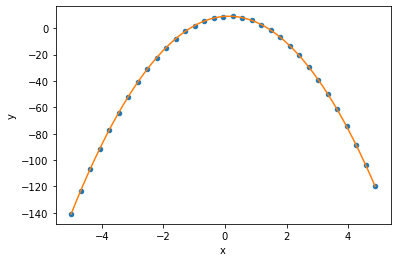

In [11]:
# Plot
x = np.linspace(df[0].min(), df[0].max(), 1000)
plot = df.plot.scatter(x=0, y=1)
plot.plot(x, f(x), color='tab:orange')
plot.set_xlabel("x")
plot.set_ylabel("y")
plot